In [1]:
import pandas as pd
from pathlib import Path
from sad2_final_project.analysis import add_missing_metrics_from_experiment, loader_obsolete_data
from sad2_final_project.bnfinder import load_external_data
import os

# paths
## set global dir
cwd=Path.cwd()
if cwd.name == "notebooks":
    os.chdir(cwd.parent) 
print(os.getcwd())
## create paths 
DATA_PATH = Path('data/trajectory_length_vs_attractors1')
df = loader_obsolete_data(DATA_PATH / 'results/metadata.csv', DATA_PATH / 'results/joined_results_trajectory_length_vs_attractors.csv')

/home/maxi7524/repositories/SAD2_final_project


In [ ]:
df = loader_obsolete_data(DATA_PATH / 'results/metadata.csv', DATA_PATH / 'results/joined_results_trajectory_length_vs_attractors.csv')
metrics_list=['TP', 'FP', 'FN', 'f1', 'accuracy', 'precision', 'recall', 'sensitivity', 'AHD', 'SHD', 'EHD', 'SID']
df = add_missing_metrics_from_experiment(df, DATA_PATH, metrics_list, after_column='attractor_ratio')
df

[Progress] 1/23400 conditions completed (0.0%)
[Progress] 2/23400 conditions completed (0.0%)
[Progress] 3/23400 conditions completed (0.0%)
[Progress] 4/23400 conditions completed (0.0%)
[Progress] 5/23400 conditions completed (0.0%)
[Progress] 6/23400 conditions completed (0.0%)
[Progress] 7/23400 conditions completed (0.0%)
[Progress] 8/23400 conditions completed (0.0%)
[Progress] 9/23400 conditions completed (0.0%)
[Progress] 10/23400 conditions completed (0.0%)
[Progress] 11/23400 conditions completed (0.0%)
[Progress] 12/23400 conditions completed (0.1%)
[Progress] 13/23400 conditions completed (0.1%)
[Progress] 14/23400 conditions completed (0.1%)
[Progress] 15/23400 conditions completed (0.1%)
[Progress] 16/23400 conditions completed (0.1%)
[Progress] 17/23400 conditions completed (0.1%)
[Progress] 18/23400 conditions completed (0.1%)
[Progress] 19/23400 conditions completed (0.1%)
[Progress] 20/23400 conditions completed (0.1%)
[Progress] 21/23400 conditions completed (0.1%)
[

CZĘŚĆ 2

In [4]:
from sad2_final_project.analysis import analyze_datasets_from_index
df_series =  analyze_datasets_from_index(df, 'condition_id_name', DATA_PATH, 1)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

## DROPPING VALUES 
df_series['scale'] = df_series["trajectory_length"] / df_series["num_nodes"]
df_series = df_series[df_series['scale'] < 1.5]

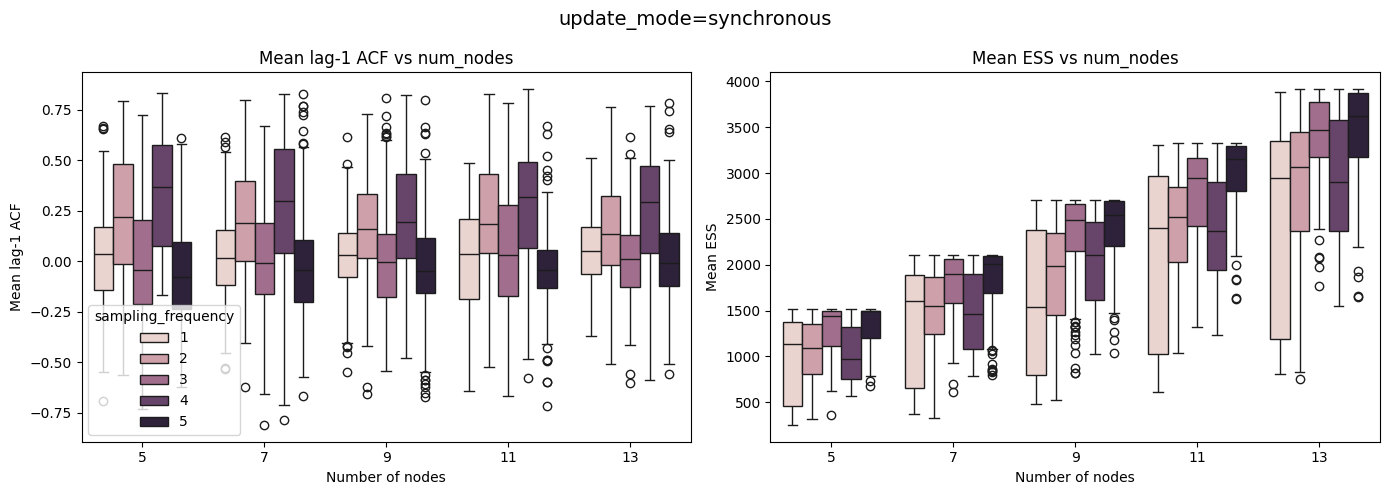

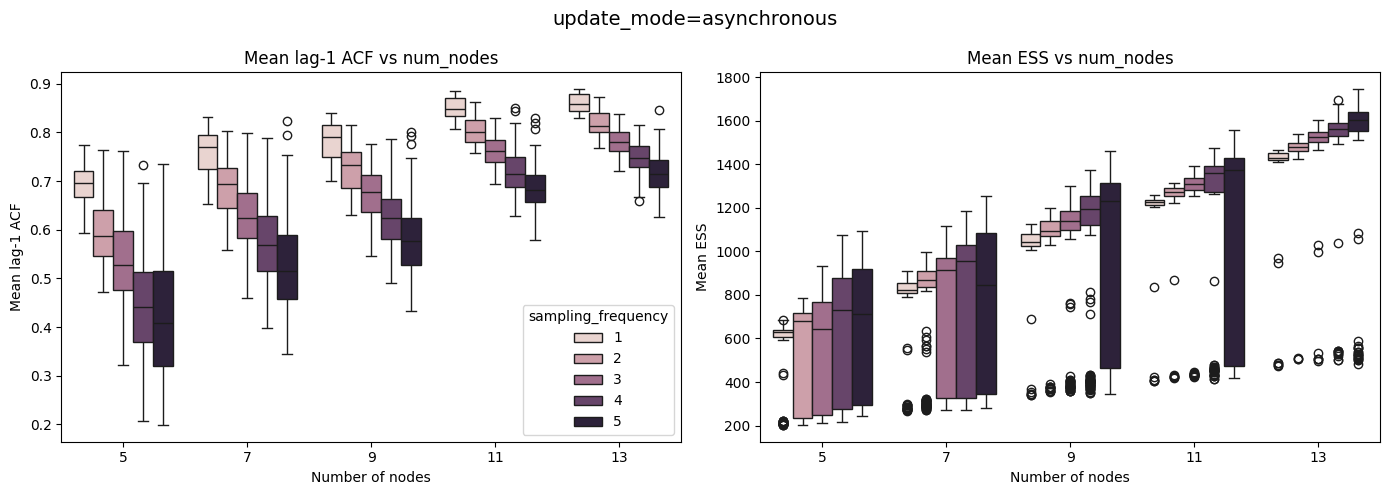

In [13]:
for update_mode in df_series["update_mode"].unique():
    # for score_function in df_series["score_function"].unique():
    
    df_sub = df_series[
        (df_series["update_mode"] == update_mode)
    ]
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharex=True)
    
    sns.boxplot(
        data=df_sub,
        x="num_nodes",
        y="mean_lag1_acf",
        hue="sampling_frequency",
        ax=axes[0]
    )
    axes[0].set_title("Mean lag-1 ACF vs num_nodes")
    axes[0].set_xlabel("Number of nodes")
    axes[0].set_ylabel("Mean lag-1 ACF")
    
    sns.boxplot(
        data=df_sub,
        x="num_nodes",
        y="mean_ess",
        hue="sampling_frequency",
        ax=axes[1]
    )
    axes[1].set_title("Mean ESS vs num_nodes")
    axes[1].set_xlabel("Number of nodes")
    axes[1].set_ylabel("Mean ESS")
    
    # legenda tylko raz
    axes[1].legend_.remove()
    axes[0].legend(title="sampling_frequency")
    
    fig.suptitle(
        f"update_mode={update_mode}",
        fontsize=14
    )
    
    plt.tight_layout()
    plt.show()

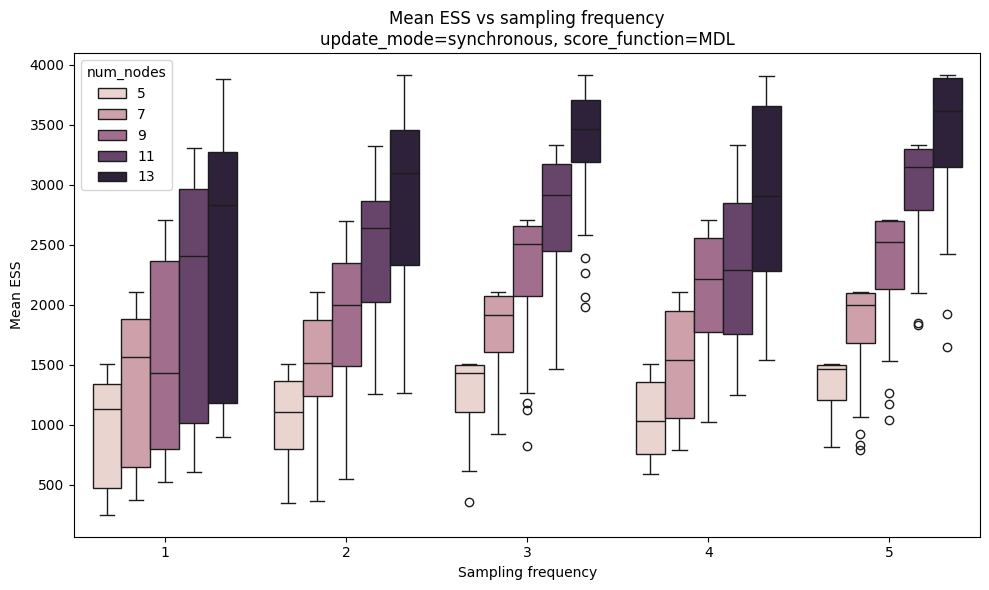

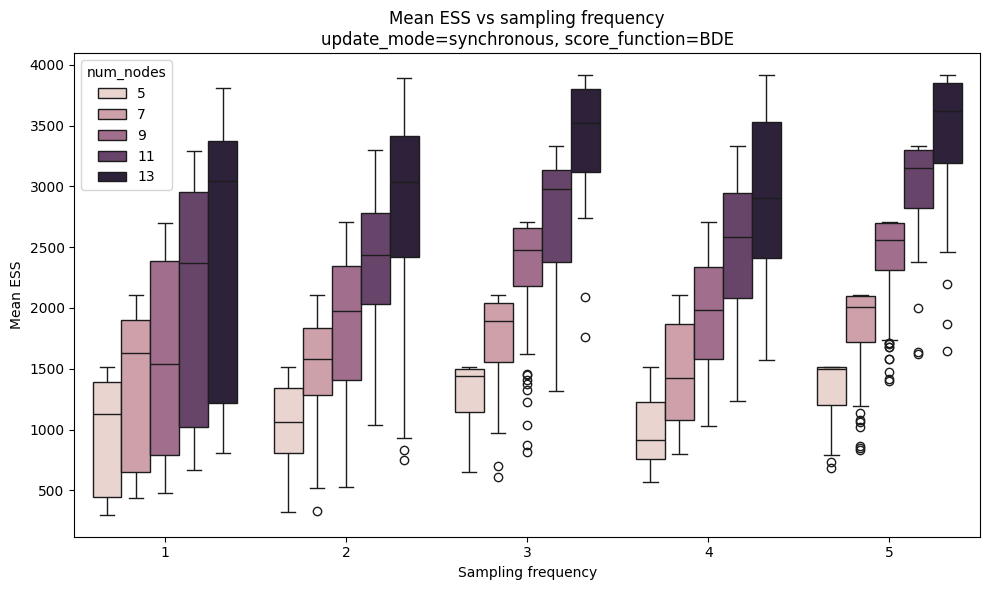

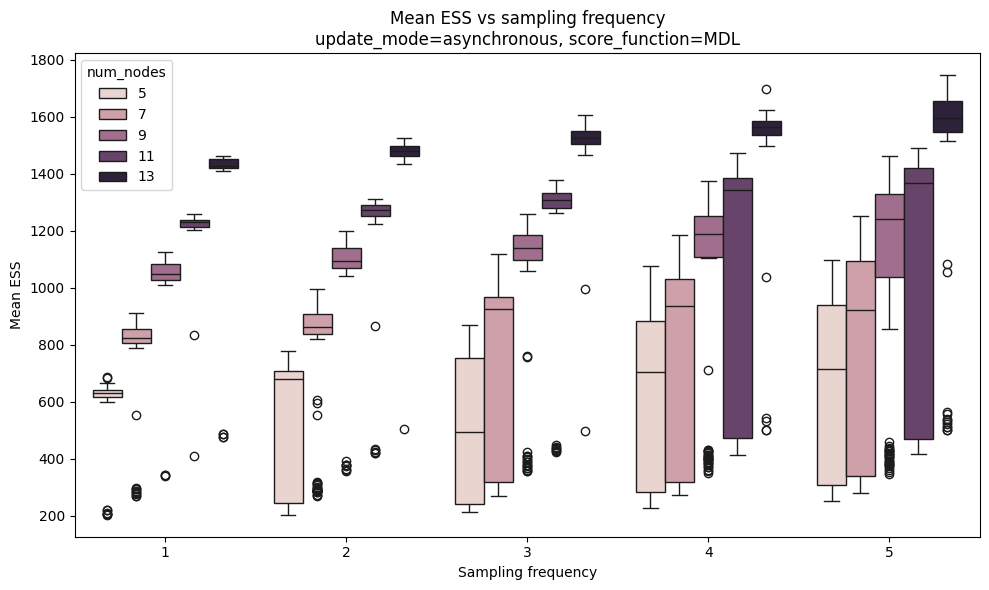

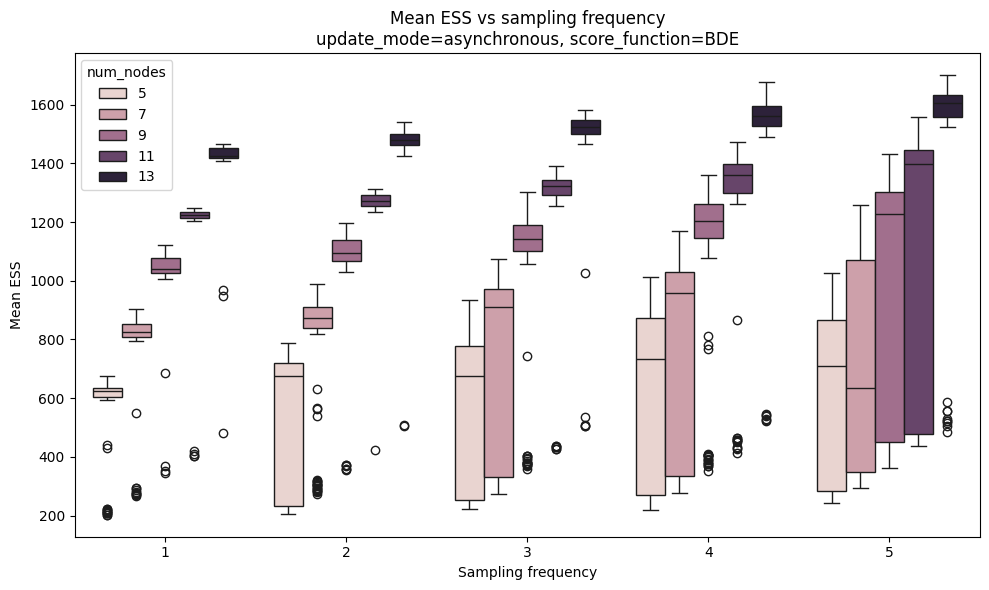

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

for update_mode in df_series["update_mode"].unique():
    for score_function in df_series["score_function"].unique():
        
        df_sub = df_series[
            (df_series["update_mode"] == update_mode) &
            (df_series["score_function"] == score_function)
        ]
        
        plt.figure(figsize=(10, 6))
        
        sns.boxplot(
            data=df_sub,
            x="sampling_frequency",
            y="mean_ess",
            hue="num_nodes"
        )
        
        plt.title(
            f"Mean ESS vs sampling frequency\n"
            f"update_mode={update_mode}, score_function={score_function}"
        )
        plt.xlabel("Sampling frequency")
        plt.ylabel("Mean ESS")
        
        plt.legend(title="num_nodes")
        plt.tight_layout()
        plt.show()


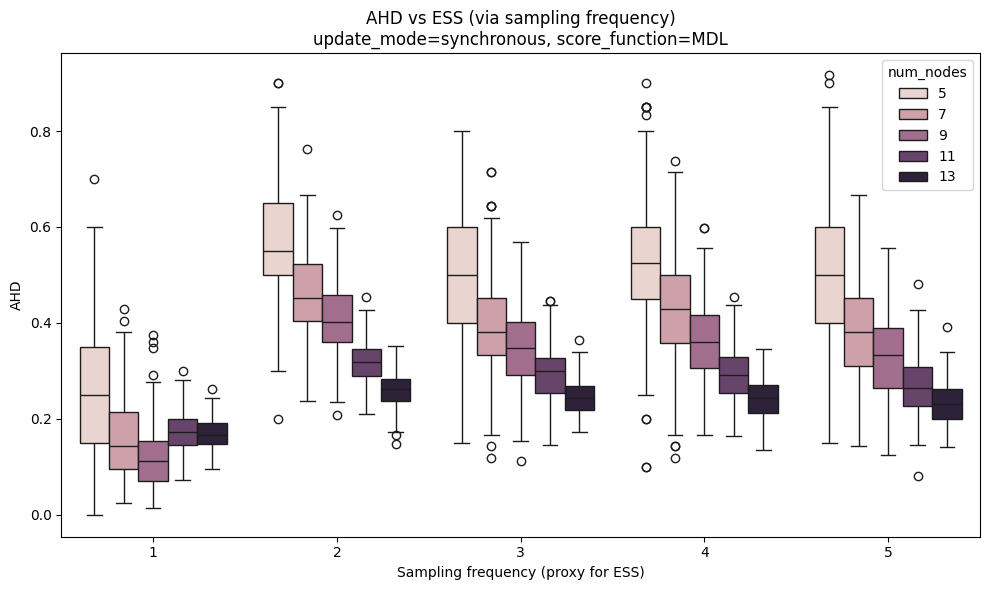

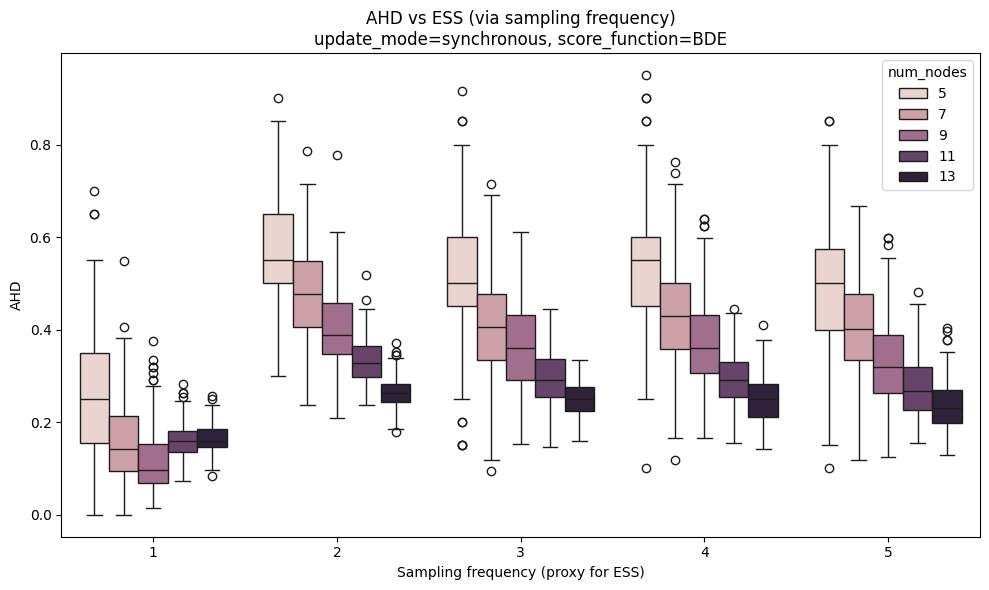

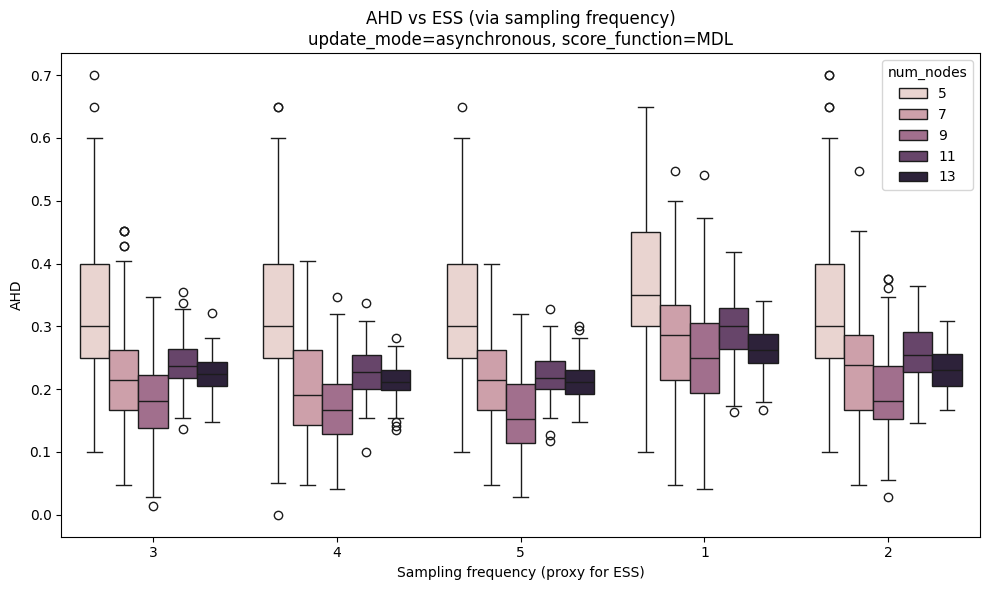

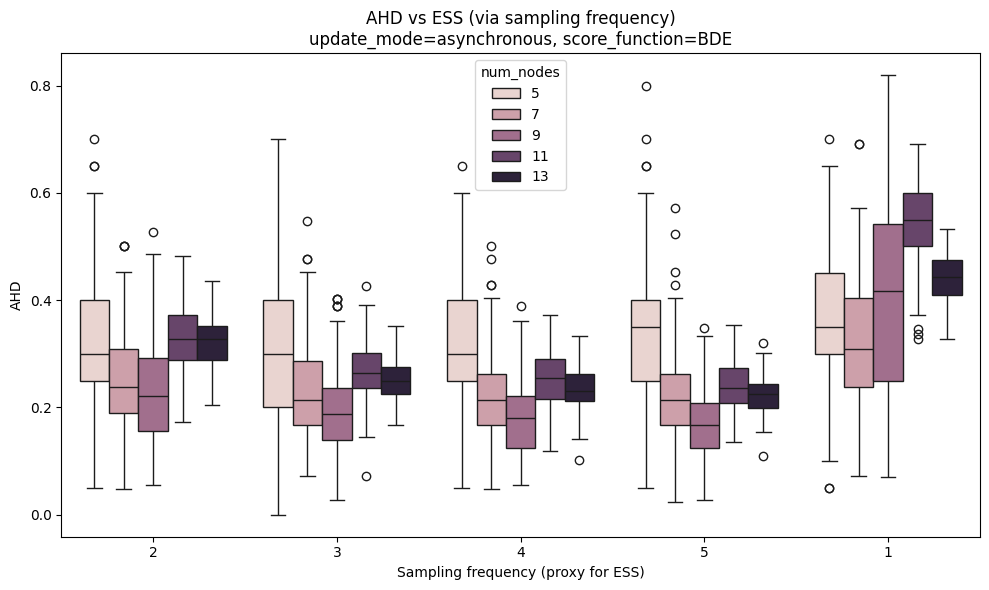

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

for update_mode in df_series["update_mode"].unique():
    for score_function in df_series["score_function"].unique():
        
        df_sub = df_series[
            (df_series["update_mode"] == update_mode) &
            (df_series["score_function"] == score_function)
        ].copy()
        
        # traktujemy sampling_frequency jako proxy dla ESS
        df_sub["sampling_frequency"] = df_sub["sampling_frequency"].astype(str)
        
        plt.figure(figsize=(10, 6))
        
        sns.boxplot(
            data=df_sub,
            x="sampling_frequency",
            y="AHD",
            hue="num_nodes"
        )
        
        plt.title(
            f"AHD vs ESS (via sampling frequency)\n"
            f"update_mode={update_mode}, score_function={score_function}"
        )
        plt.xlabel("Sampling frequency (proxy for ESS)")
        plt.ylabel("AHD")
        
        plt.legend(title="num_nodes")
        plt.tight_layout()
        plt.show()


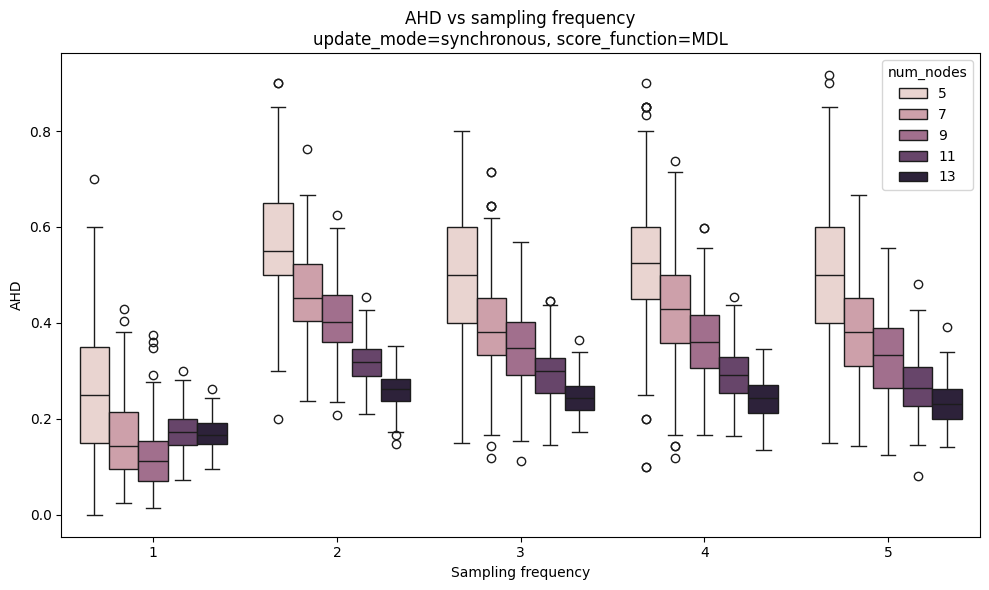

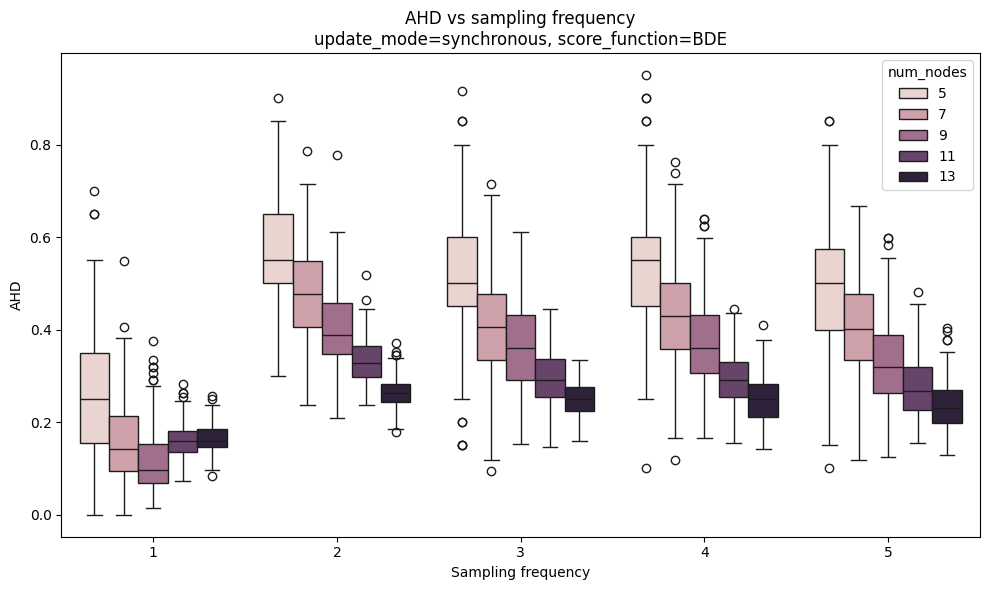

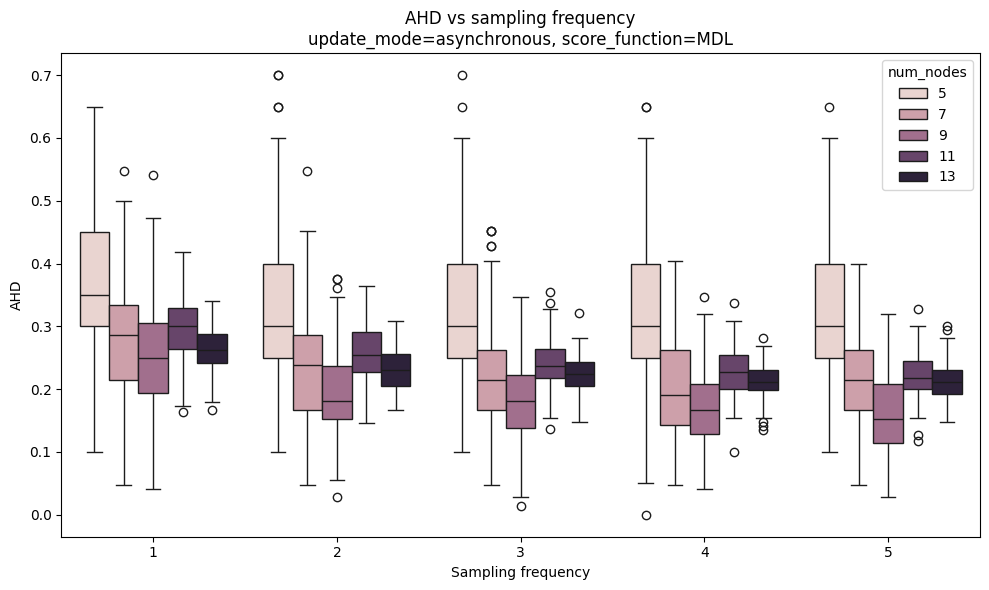

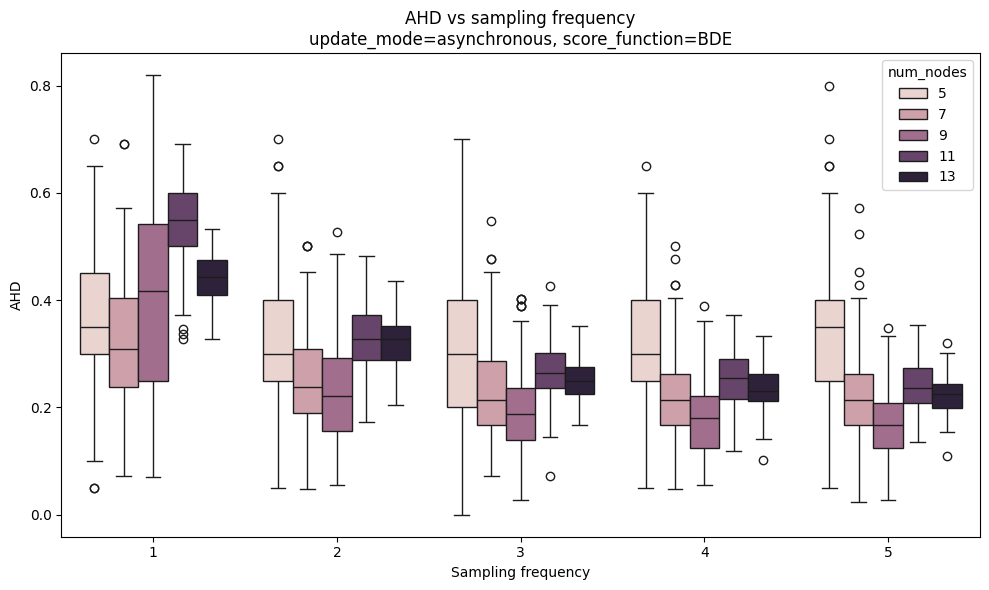

In [17]:
for update_mode in df_series["update_mode"].unique():
    for score_function in df_series["score_function"].unique():
        
        df_sub = df_series[
            (df_series["update_mode"] == update_mode) &
            (df_series["score_function"] == score_function)
        ]
        
        plt.figure(figsize=(10, 6))
        
        sns.boxplot(
            data=df_sub,
            x="sampling_frequency",
            y="AHD",
            hue="num_nodes"
        )
        
        plt.title(
            f"AHD vs sampling frequency\n"
            f"update_mode={update_mode}, score_function={score_function}"
        )
        plt.xlabel("Sampling frequency")
        plt.ylabel("AHD")
        
        plt.legend(title="num_nodes")
        plt.tight_layout()
        plt.show()


IDEA DLA JOANNY 

In [ ]:
df_summary = (
    df
    .groupby(["trajectory_length", "num_nodes"])
    .agg(
        median_ar=("attractor_ratio", "median"),
        q25_ar=("attractor_ratio", lambda x: x.quantile(0.25)),
        mean_ar=("attractor_ratio", "mean"),
        std_ar=("attractor_ratio", "std"),
        n=("attractor_ratio", "size")
    )
    .reset_index()
)
df_summary["scale_ratio"] = (
    df_summary["trajectory_length"] / df_summary["num_nodes"]
)

In [ ]:
# trzeba wywalić wszystkie dane które mają za dużo atraktorów
# czyli wszystkie se scale ratio < 2 możemy wziąć tylko wtedy 

In [ ]:
df_summary["scale_ratio"] = (
    df_summary["trajectory_length"] / df_summary["num_nodes"]
)
df_summary

,trajectory_length,num_nodes,median_ar,q25_ar,mean_ar,std_ar,n,scale_ratio
0,10,5,0.876246,0.667560,0.785662,0.205530,600,2.000000
1,10,7,0.791190,0.491120,0.690165,0.273711,600,1.428571
2,10,9,0.698704,0.289782,0.594321,0.322780,600,1.111111
3,10,11,0.634766,0.168255,0.540005,0.350391,600,0.909091
4,10,13,0.551619,0.098029,0.486880,0.363200,600,0.769231
5,15,5,0.919281,0.800633,0.853411,0.164220,600,3.000000
6,15,7,0.860757,0.602486,0.756670,0.241930,600,2.142857
7,15,9,0.810556,0.460341,0.692933,0.280490,600,1.666667
8,15,11,0.768473,0.332034,0.637546,0.321061,600,1.363636
9,15,13,0.714176,0.199570,0.576234,0.355616,600,1.153846


<Axes: xlabel='scale_ratio', ylabel='median_ar'>

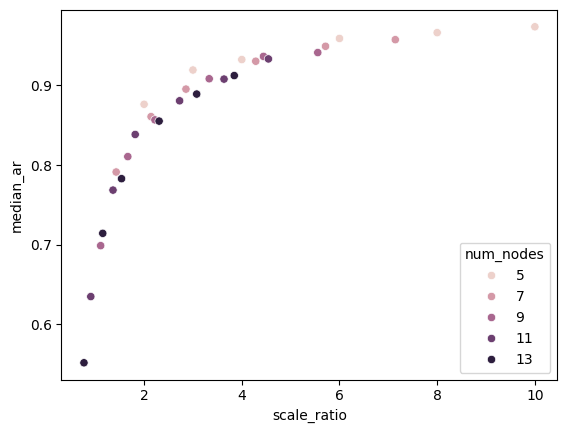

In [21]:
import seaborn as sns
sns.scatterplot(
    data=df_summary,
    x="scale_ratio",
    y="median_ar",
    hue="num_nodes"
)


<Axes: xlabel='trajectory_length', ylabel='num_nodes'>

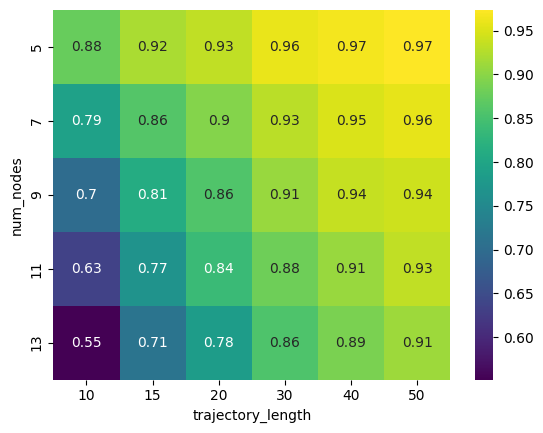

In [22]:
pivot = df_summary.pivot(
    index="num_nodes",
    columns="trajectory_length",
    values="median_ar"
)

sns.heatmap(pivot, cmap="viridis", annot=True)
